<a href="https://colab.research.google.com/github/animalran/csvfiles/blob/master/Copy_of_Linear__regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from statistics import stdev 
from statistics import variance
from scipy import stats
from math import sqrt
#!pip install yfinance

In [0]:
from pandas import read_csv
import statsmodels
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
from matplotlib import pyplot as plt
import yfinance as yf

In [0]:
symbol1 ="HDFCBANK.NS"
symbol2 ="SBIN.NS"

In [0]:
stock1 = yf.Ticker(symbol1)    
stock2 = yf.Ticker(symbol2)    
hist1 = stock1.history(period="246d")
hist2 = stock2.history(period="246d")

In [0]:
#symbol1="HDFCBANK"
#symbol2="HDFC"

In [0]:
#urla="https://raw.githubusercontent.com/animalran/csvfiles/master/"
#urlb="EQN.csv"
#url1=urla+symbol1+urlb
#url2=urla+symbol2+urlb

In [0]:
#dataset1=pd.read_csv(url1)
#dataset2=pd.read_csv(url2)
#dataset2.shape

In [0]:
#dataset2.describe()

In [0]:
#data1=dataset1['Close Price']
#data2=dataset2['Close Price']
data1=hist1["Close"]
data2=hist2["Close"]

In [0]:
x=data1.values.reshape(-1,1)
y=data2.values.reshape(-1,1)

In [0]:
# training data 80%; test 20%
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
#regressor = LinearRegression()
reg1=LinearRegression().fit(x,y)# linear regression
reg2=LinearRegression().fit(y,x)
#reg2=LinearRegression().fit(y_train,x_train)#reversing the dependent and independent variables

In [161]:
#To retrieve the intercept:
intercept1=reg1.intercept_
intercept2=reg2.intercept_
print('Intercept 1:',reg1.intercept_)
print('Intercept 2:',reg2.intercept_)
#print(reg2.intercept_)
#For retrieving the slope:
slope1=reg1.coef_
slope2=reg2.coef_
print('Slope 1:',reg1.coef_)
print('Slope 2:',reg2.coef_)
#print(reg2.coef_)
intercept1

Intercept 1: [-135.35519479]
Intercept 2: [602.25751162]
Slope 1: [[0.37224721]]
Slope 2: [[1.88190682]]


array([-135.35519479])

In [0]:
# prediction on the train data set
y_pred = reg1.predict(x)
x_pred = reg2.predict(y)

error ratio1: 0.6137926402279238
error ratio2: 0.35661970175908975
0.359463866336035


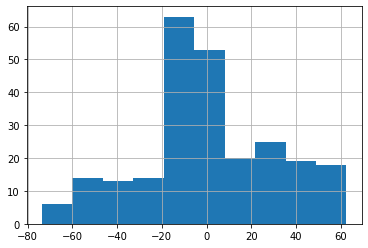

In [163]:
# compair actual output and predicted values
df1 = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df2 = pd.DataFrame({'Actual': x.flatten(), 'Predicted': x_pred.flatten()})
residuals1=y-y_pred
residuals2=x-x_pred
res1_1D=residuals1.flatten()
res2_1D=residuals2.flatten()
res1=pd.Series(res1_1D)
res2=pd.Series(res2_1D)
mx=x.mean()
my=y.mean()
sx2 = ((x-mx)**2).sum()
sy2 = ((y-my)**2).sum()
er_ratio1 = sqrt(1./len(x) + mx*mx/sx2)
er_ratio2 = sqrt(1./len(y) + my*my/sy2)
print('error ratio1:',er_ratio1)
print('error ratio2:',er_ratio2)
#sd_intercept = see * sqrt(1./len(x) + mx*mx/sx2)
r=res2
#sd_slope = see * sqrt(1./sx2)
#see??= std_error
#type(residuals2)
sigma=stdev(r)
std_err=r[244]/sigma
print(std_err)
res1.hist()
plt.show()

In [0]:
#print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

In [0]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

In [166]:
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(r, printResults = True)#non_stationary_series
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -1.996447
P-Value                   0.288133
# Lags Used               2.000000
# Observations Used     242.000000
Critical Value (1%)      -3.457664
Critical Value (5%)      -2.873559
Critical Value (10%)     -2.573175
dtype: float64
Is the time series stationary? False


In [167]:
#series = read_csv('daily-total-female-births.csv', header=0, index_col=0, squeeze=True)
p_value = r.values
result = adfuller(p_value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
result[1]

ADF Statistic: -1.996447
p-value: 0.288133
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


0.2881333551509093

In [169]:
sheet=[[symbol1,symbol2,intercept1,slope1,result[1],std_err,sigma]]
df = pd.DataFrame(sheet, columns = ['y_stock', 'x_stock','intercept','beta/slope','p_value','std_err/z_score','sigma/'])
df

,y_stock,x_stock,intercept,beta/slope,p_value,std_err/z_score,sigma/
0,HDFCBANK.NS,SBIN.NS,[-135.3551947901861],[[0.37224721404634675]],0.288133,0.359464,66.599327


In [0]:
def line(x):
    